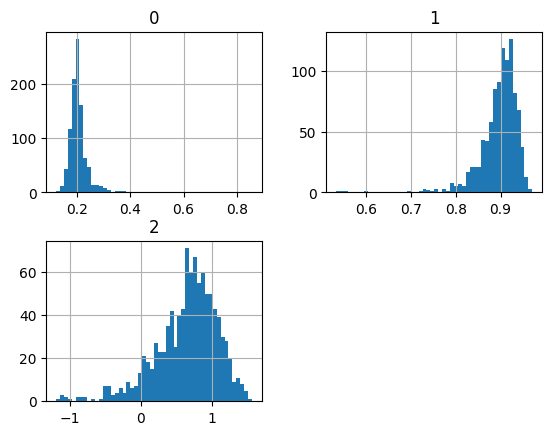

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ruta='/content/drive/MyDrive/Ingeniería y Ciencia de Datos/Segundo Semestre/Ingeniería de Características/Colab Notebooks/csv/'
df_num=pd.read_csv(ruta+'numericos.csv')
H=df_num.hist(bins=50)

In [2]:
# Para la variable '0'. (Sesgo positivo)
df_num['0'].skew()

6.000314443254863

In [3]:
df_transformada=df_num.copy()
lmbd=-11 # -10 # -11 # -9 # -7 # -5 # -2 # -1
df_transformada['0']=(df_num['0']-df_num['0'].min()+1)**lmbd
df_transformada['0'].skew()

0.04181647238238833

In [4]:
# Para la variable '1'
df_num['1'].skew()

-2.7727359656797956

In [5]:
lmbd=17 # 18 # 17 # 15 # 10 # 5 # 2
df_transformada['1']=(df_num['1']-df_num['1'].min()+1)**lmbd
df_transformada['1'].skew()

-0.027448039332947635

In [6]:
df_num['2'].skew()

-1.0123789106323249

In [7]:
lmbd=3 # ?
df_transformada['2']=(df_num['2']-df_num['2'].min()+1)**lmbd
df_transformada['2'].skew()

0.03113961761990119

¿Cómo lo hacemos de forma automática?

In [8]:
df=pd.read_csv(ruta+'sesgo.csv')
df.skew()

1.0     1.021248
1.1     1.118874
1.2     1.207519
1.4     1.438625
1.5     1.500396
2.5     2.510211
3.0     3.080673
0.7     0.706180
0.6     0.615026
0.8     0.794087
0.5     0.497091
0.4     0.403480
-1.0   -1.068644
-0.8   -0.809842
-0.6   -0.607353
-0.5   -0.498200
-2.0   -2.098751
-1.5   -1.503588
-1.3   -1.310040
-2.5   -2.512621
-3.0   -3.053941
dtype: float64

In [9]:
# Función para buscar 'lmbd'
def buscar_lmbd(x):

  lmbds=np.arange(-10,10,0.2)
  sesgos=[]
  for lmbd in lmbds:
    if np.abs(lmbd)<0.1:
      x_t=np.log(x-x.min()+1)
    else:
      x_t=((x-x.min()+1)**lmbd-1)
    sesgos.append(x_t.skew())

  best=np.argmin(np.abs(sesgos))
  lmbd=lmbds[best]
  sesgo=sesgos[best]

  return lmbd,sesgo

In [10]:
buscar_lmbd(df_num['0'])

(-10.0, -0.09285192946946626)

In [11]:
print("Sesgo i.\t Potencia\t Sesgo resultante")
for var in df:
  lmbd,sesgo=buscar_lmbd(df[var])
  print(var,round(lmbd,2),round(sesgo,2),sep='\t\t')

Sesgo i.	 Potencia	 Sesgo resultante
1.0		0.2		-0.06
1.1		0.2		-0.04
1.2		-0.0		-0.13
1.4		-0.0		0.01
1.5		0.2		0.1
2.5		-0.6		-0.04
3.0		-1.6		0.03
0.7		0.4		0.07
0.6		0.4		-0.09
0.8		0.4		0.09
0.5		0.6		0.03
0.4		0.6		-0.02
-1.0		2.4		-0.04
-0.8		2.0		-0.05
-0.6		2.0		0.02
-0.5		1.6		-0.0
-2.0		5.6		-0.01
-1.5		4.6		-0.0
-1.3		3.4		0.02
-2.5		7.0		-0.0
-3.0		8.6		-0.01


Para estimar qué transformación aplicar según el sesgo inicial de la variable, se tiene

Sesgo inicial|Función|Sesgo resultante
-------------|-------|----------------
-3|$x^{8.6}$|-0.01
(-3,-2.5)|$x^{7}$|0
(-2.5,-2)|$x^{5.6}$|-0.01
(-2.0,-1.5)|$x^{4.6}$|0
(-1.5,-1.3)|$x^{3.4}$|0.02
-0.5|$x^{1.6}$|0
(-0.8,-0.6)|$x^{2}$|-0.05
(0.4,0.5)|$x^{0.6}$|-0.03
(0.6,0.8)|$x^{0.4}$|$\pm$0.09
(1.0,1.1)|$x^{0.2}$|-0.06
(1.2,1.4)|$\mathrm{ln}(x)$|-0.13
(1.4,1.5)|$x^{0.2}$|0.1
(1.5,2.5)|$x^{-0.6}$|-0.04
(2.5,3.0)|$x^{-1.6}$|0.03

Por lo que podemos considerar como variables con distribución simétrica si el sesgo está entre el rango $(-0.13,0.1)$.

# Box-Cox
Modificamos la transformación de potencias de forma que podamos tener funciones contínuas al hacer tender $\lambda\rightarrow0$, esta es
$$
f(x)=\frac{x^\lambda-1}{\lambda},
$$
al encontrar el límite, se tiene
$$
\lim_{\lambda\rightarrow0}\frac{x^\lambda-1}{\lambda}=\lim_{\lambda\rightarrow0}\frac{x^\lambda\mathrm{ln}(x)}{\lambda}=\mathrm{ln}(x),
$$
resultando
$$
x'=\left\{\begin{array}{ll}
\dfrac{x^\lambda-1}{\lambda},&\lambda\neq0\\
\mathrm{ln}(x),&\lambda=0;
\end{array}\right.
$$
para $x\in[1,\infty)$.

In [12]:
from scipy.stats import boxcox

In [13]:
print("Sesgo i.\t Potencia\t Sesgo resultante")
for var in df:
  x=df[var]
  x_t,lmbd=boxcox(x-x.min()+1)
  sesgo=pd.DataFrame(x_t).skew()
  print(var,round(lmbd,2),round(sesgo,2),sep='\t\t')

Sesgo i.	 Potencia	 Sesgo resultante
1.0		0.24		0    0.01
dtype: float64
1.1		0.23		0    0.01
dtype: float64
1.2		0.09		0    0.01
dtype: float64
1.4		-0.01		0   -0.0
dtype: float64
1.5		0.14		0    0.01
dtype: float64
2.5		-0.65		0   -0.03
dtype: float64
3.0		-1.18		0    0.21
dtype: float64
0.7		0.35		0    0.01
dtype: float64
0.6		0.49		0    0.02
dtype: float64
0.8		0.34		0    0.01
dtype: float64
0.5		0.6		0    0.03
dtype: float64
0.4		0.64		0    0.02
dtype: float64
-1.0		2.44		0   -0.02
dtype: float64
-0.8		1.94		0   -0.08
dtype: float64
-0.6		1.86		0   -0.05
dtype: float64
-0.5		1.62		0    0.01
dtype: float64
-2.0		4.56		0   -0.27
dtype: float64
-1.5		3.71		0   -0.26
dtype: float64
-1.3		2.85		0   -0.21
dtype: float64
-2.5		5.69		0   -0.28
dtype: float64
-3.0		7.89		0   -0.13
dtype: float64


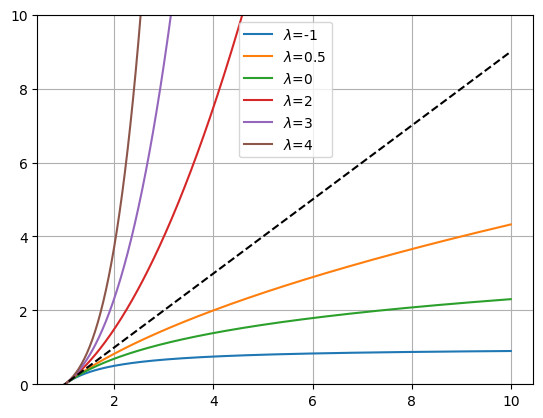

In [14]:
x=np.linspace(0.9,10,500) # Variable a transforrmar
lambdas=[-1,0.5,0,        # Potencias para compensar el sesgo positivo
         2, 3,  4]        # Potencias para compensar el sesgo negativo
for lmbd in lambdas:
  xp=boxcox(x,lmbd)
  plt.plot(x,xp,label='$\lambda$={}'.format(lmbd))
plt.legend()
plt.plot(x,x-1,'--k')
plt.ylim([0,10])
plt.grid()

---
Modificamos la transformación de Box-Cox para que el rango de la transformación contemple valores negativos:
$$
x'=\left\{\begin{array}{ll}
\mathrm{sign}(x)\dfrac{|x|^\lambda-1}{\lambda},&\lambda\neq0\\
\mathrm{sign}(x)\mathrm{ln}(|x|),&\lambda=0,
\end{array}\right.
$$
para $|x|\geq1$.

In [15]:
def boxcoxS(x,lmbd):
  if lmbd==0:
    return np.sign(x)*np.log(np.abs(x))
  else:
    return np.sign(x)*(np.abs(x)**lmbd-1)/lmbd

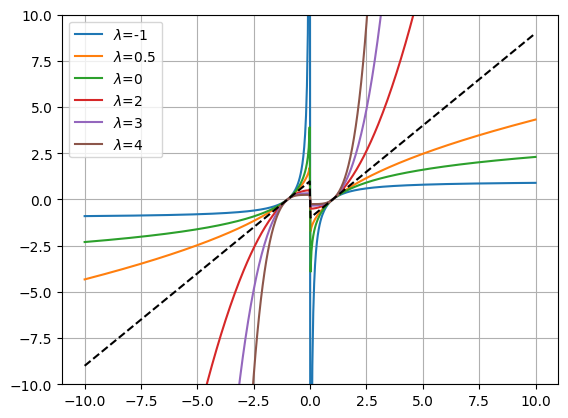

In [16]:
x=np.linspace(-10,10,500)
for lmbd in lambdas:
  xp=boxcoxS(x,lmbd)
  plt.plot(x,xp,label='$\lambda$={}'.format(lmbd))
plt.legend()
plt.plot(x,boxcoxS(x,1),'--k')
plt.ylim([-10,10])
plt.grid()

Modificamos una vez más la transformación para evitar la indeterminación en cero:
$$
x'=\left\{\begin{array}{ll}
\mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda},&\lambda\neq0\\
\mathrm{sign}(x)\mathrm{ln}(|x|+1),&\lambda=0,
\end{array}\right.
$$
para $x\in\mathbb{R}$.

In [17]:
def boxcoxS(x,lmbd):
  if lmbd==0:
    return np.sign(x)*np.log(np.abs(x)+1)
  else:
    return np.sign(x)*((np.abs(x)+1)**lmbd-1)/lmbd

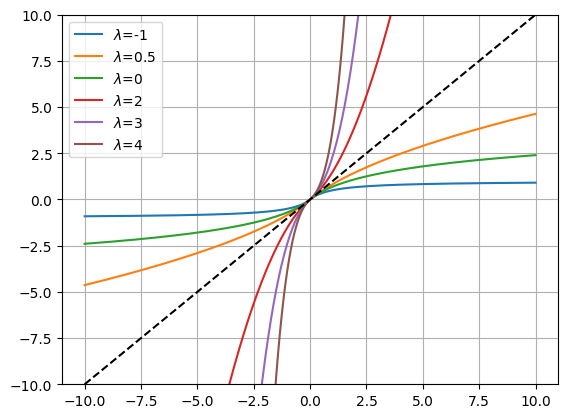

In [18]:
for lmbd in lambdas:
  xp=boxcoxS(x,lmbd)
  plt.plot(x,xp,label='$\lambda$={}'.format(lmbd))
plt.legend()
plt.plot(x,boxcoxS(x,1),'--k')
plt.ylim([-10,10])
plt.grid()

Para compensar sesgos positivos, la función debe estar todo el tiempo por debajo de la línea punteada, de forma análoga, para compensar sesgos negativos, la función debe estar todo el tiempo por encima de la línea punteada. Entonces, modificamos una vez más la transformación para aplicar diferentes potencias dependiendo del signo de $x$:
$$
x'=\left\{\begin{array}{rl}
\dfrac{(x+1)^{\lambda_+}-1}{\lambda_+},&x>0,\lambda_+\neq0\\
-\dfrac{(-x+1)^{\lambda_-}-1}{\lambda_-},&x\leq0,\lambda_-\neq0\\
\mathrm{ln}(x+1),&x>0,\lambda_+=0\\
-\mathrm{ln}(-x+1),&x\leq0,\lambda_-=0
\end{array}\right.
$$

# Yeo-Johnson
para que la variable resultante $x'$, sea dos veces continuamente diferenciable en cero (donde se hace el cambio de potencias), se debe cumplir $\lambda_++\lambda_-=2$. La transformación se puede reescribir de la siguiente forma
$$
x'=\left\{\begin{array}{rl}
\dfrac{(x+1)^{\lambda}-1}{\lambda},&x>0,\lambda\neq0\\
-\dfrac{(-x+1)^{2-\lambda}-1}{2-\lambda},&x\leq0,\lambda\neq2\\
\mathrm{ln}(x+1),&x>0,\lambda=0\\
-\mathrm{ln}(-x+1),&x\leq0,\lambda=2
\end{array}\right.
$$

In [19]:
from scipy.stats import yeojohnson

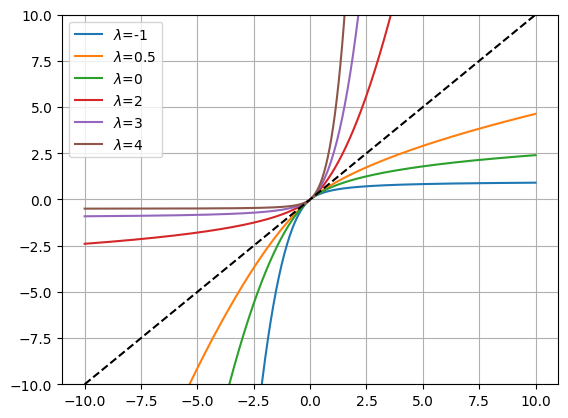

In [20]:
for lmbd in lambdas:
  xp=yeojohnson(x,lmbd)
  plt.plot(x,xp,label='$\lambda$={}'.format(lmbd))
plt.legend()
plt.plot(x,x,'--k')
plt.ylim([-10,10])
plt.grid()

In [21]:
df_YJ=df.copy()
print('Sesgo inicial\t\t Potencia\t\t Sesgo final')
for var in df:
  df_YJ[var],lmbd=yeojohnson(df[var])
  print(var,lmbd,df_YJ[var].skew(),sep='\t\t')

Sesgo inicial		 Potencia		 Sesgo final
1.0		0.5311154339945351		0.04531429598349309
1.1		0.4898301162128393		0.05404457244847119
1.2		0.5100994890698081		0.056875044078883524
1.4		0.40488713688548666		0.03085301244242718
1.5		0.36569856421523617		0.04443106695412477
2.5		-0.0760345077405888		-0.05570705670482321
3.0		-0.9503741706964586		0.18652603985458968
0.7		0.6631982714747888		0.03451869650225463
0.6		0.7471116028820255		0.05968394949698749
0.8		0.6577067979989445		0.05308460197065438
0.5		0.8238319861512484		0.07627341015637566
0.4		0.8450554029109212		0.05096170015488833
-1.0		1.5121480633208664		-0.05410308435284065
-0.8		1.7564645985562013		-0.1045592353494675
-0.6		1.503483442829808		-0.0878904298857118
-0.5		1.7783614691864327		0.01796171559178947
-2.0		3.2940215635242938		-0.3642202718011598
-1.5		3.170027314466167		-0.2904790406163207
-1.3		4.351316892817749		-0.1343400933162643
-2.5		4.305737531388955		-0.35061365766689123
-3.0		5.7451304749520355		-0.15913605216196441


## Regresión lineal

In [22]:
df=pd.read_csv(ruta+'regresion.csv')
df.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
X,x,Y,y=train_test_split(df[['x']],df['y']) # Separación de datos para prueba y entrenamiento

# Etapa de entrenamiento
lin=LinearRegression()
X_t,lmbd_x=yeojohnson(X)  # Transformación de 'x'
Y_t,lmbd_y=yeojohnson(Y)  # Transformación de 'y'
lin.fit(X_t,Y_t)

LinearRegression()

In [25]:
# Etapa de prueba/predicción
df_YJ=df.copy()
df_YJ['x']=yeojohnson(df[['x']],lmbd_x)
df_YJ['y']=yeojohnson(df[['y']],lmbd_y)
prediccion=lin.predict(df_YJ[['x']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
yj_x=PowerTransformer(standardize=False)
yj_x.fit(X)
yj_y=PowerTransformer(standardize=False)
yj_y.fit(Y.values.reshape(-1,1))
yj_x.lambdas_,yj_y.lambdas_

(array([0.6973132]), array([-0.21567972]))

In [28]:
lmbd_x,lmbd_y

(array([0.6973132]), -0.21567970864704503)

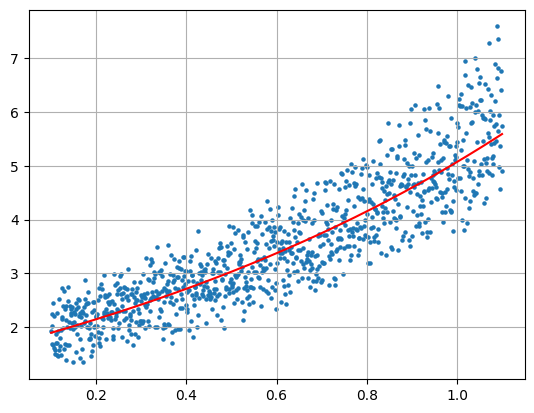

In [29]:
plt.scatter(df['x'],df['y'],s=5)
prediccion_inv=yj_y.inverse_transform(prediccion.reshape(-1,1))
plt.plot(df['x'],prediccion_inv,'r')
plt.grid()